In [132]:
import peakutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import peakutils
from peakutils.plot import plot as pplot
from Compute import rolling_mean, rolling_mean_1d

def rolling_iteratively(data, m, n=1):
    result = rolling_mean_1d(data,m)
    if n == 1:
        return result
    else:
        return rolling_iteratively(result,m,n-1)

noise 1.1844151033043957


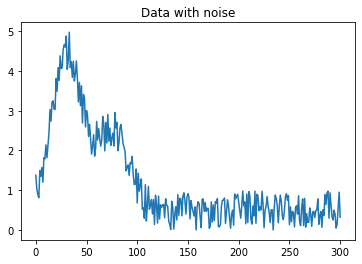

In [140]:
centers = (30.5, 75.5)
x = np.linspace(0, 300, 301)
# y = np.zeros(x.shape)
y = (peakutils.gaussian(x, 4, centers[0], 15) +
    peakutils.gaussian(x, 2, centers[1], 15) +
    np.random.rand(x.size))
# plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Data with noise")
noise = y.std()
print(f"noise {noise}")

[ 4  6  8 10 14 17 20 22 24 28 30 33 35 37 40 43 45 47 50 53 57 60 62 66
 69 71 73 76 78 80 84 91 93 95 99]
[ 4.  6.  8. 10. 14. 17. 20. 22. 24. 28. 30. 33. 35. 37. 40. 43. 45. 47.
 50. 53. 57. 60. 62. 66. 69. 71. 73. 76. 78. 80. 84. 91. 93. 95. 99.] [1.49407222 1.57352105 1.82053087 2.14102187 3.0281483  3.24941964
 3.80937275 4.08500917 4.38055771 4.66362374 4.87849892 4.97408884
 4.23538555 4.24422321 4.25176695 3.71023459 3.6270295  3.40985208
 3.00829263 2.66069547 2.39688777 2.7315902  2.54990317 2.85727556
 2.7085949  2.9069831  2.56470796 2.43487274 2.95159301 2.70863475
 2.6539567  1.63907033 1.69329099 1.85166529 1.53428915]


Text(0.5, 1.0, 'First estimate')

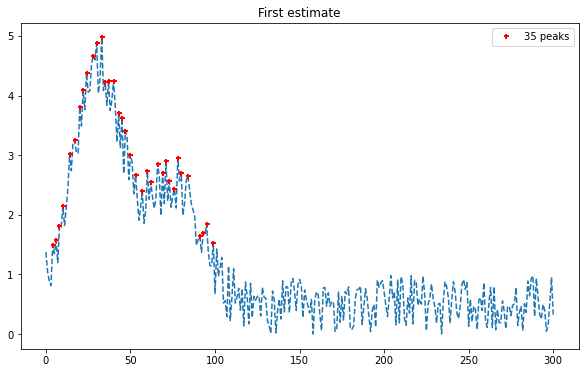

In [141]:
indexes = peakutils.indexes(y, thres=0.3, min_dist=1)
print(indexes)
print(x[indexes], y[indexes])
plt.figure(figsize=(10,6))
pplot(x, y, indexes)
plt.title('First estimate')

In [142]:
# peakutils.peak.interpolate(x, y, ind=None, width=10, func=<function gaussian_fit>)
# gaussian interpolation
interpolate_indices = peakutils.peak.interpolate(x,y,indexes,width=5)
interpolate_indices


c:\python37\lib\site-packages\peakutils\peak.py:246: UserWarning: At least 3 points required for Gaussian fitting
  warnings.warn(str(e))
c:\python37\lib\site-packages\peakutils\peak.py:246: UserWarning: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
  warnings.warn(str(e))


array([ 4.        , 16.21368607, 27.03912573, 10.        , 18.14089472,
       39.89486335, 52.26073808, 33.46623095, 32.10890428, 31.4785982 ,
       30.18761332, 25.42680852, 35.        , 24.31157292, 29.90643723,
       43.        , 45.        , 42.9054348 , 43.16725468, 53.        ,
       57.        , 61.23603886, 62.        , 66.        , 69.03706553,
       71.        , 73.        , 76.        , 78.37257705, 81.04733289,
       81.48970666, 91.        , 89.11476578, 92.87067879, 99.        ])

[30. 67. 69. 71. 78.]


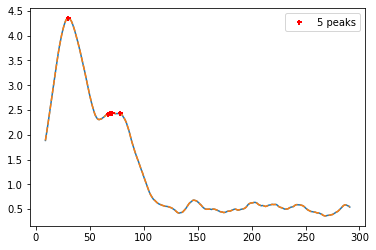

In [148]:
# Rolling average
points = 10
n_times = 2
rm_x = rolling_iteratively(x, points,n_times)
rm_y = rolling_iteratively(y, points,n_times)
indexes = peakutils.indexes(rm_y, thres=0.3, min_dist=1)

plt.plot(rm_x,rm_y)
pplot(rm_x,rm_y,indexes)
print(rm_x[indexes])

In [144]:
interpolate_indices = peakutils.peak.interpolate(rm_x,rm_y,indexes,width=5)
interpolate_indices

c:\python37\lib\site-packages\peakutils\peak.py:246: UserWarning: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
  warnings.warn(str(e))


array([ 30.3972727 ,  70.52794044,  70.95284256,  71.86410369,
        75.88848418, 146.95181442, 152.        , 162.71144833,
       170.        , 186.51408617, 201.90403906, 201.        ,
       220.15096882, 220.1366177 , 243.47387714, 256.34311958,
       287.28725776])

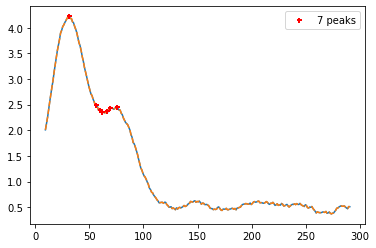

In [146]:
points = 20
rm_x = rolling_mean_1d(x, points)
rm_y = rolling_mean_1d(y, points)
indexes = peakutils.indexes(rm_y, thres=0.3, min_dist=1)
plt.plot(rm_x,rm_y)
pplot(rm_x,rm_y,indexes)

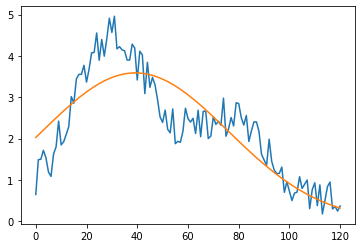

In [123]:
gaussian_fit = peakutils.gaussian_fit(rm_x,rm_y,center_only=False)
g_x = rm_x
g_y = peakutils.gaussian(g_x, gaussian_fit[0], gaussian_fit[1], gaussian_fit[2])
plt.plot(rm_x,rm_y)
plt.plot(g_x,g_y)

In [53]:


a = np.random.random((5,5))
x[np.argmax(a, axis=0)].shape

(5,)

In [54]:
np.zeros((5)).shape



(5,)

In [56]:
np.arange(0,5).shape

(5,)